* OGGM_edu - equilibirum volume to temperature bias - based on the OGGM advance and retreat

In [1]:
from oggm_edu import GlacierBed, Glacier, MassBalance, GlacierCollection
from oggm_edu.funcs import plot_glacier_graphics
from SALib.sample import saltelli
from SALib.analyze import sobol
from SALib.test_functions import Ishigami
import SALib as salib
import numpy as np

from matplotlib import pyplot as plt

ModuleNotFoundError: No module named 'SALib'

In [2]:
# Lets define the bed.
# Top and bottom altitude.
top = 5000
bottom = 0
# How far does the accumulation area extend?
accumulation_fraction = 1 / 3
# ELA altitude
ela_alt = (top - bottom) * (1 - accumulation_fraction)
# Accumulation area starts out as 1000 m. wide.
top_width = 1000
# 500 m. wide after ELA.
ela_width = 500

# Bed, note that we increase the map_dx here,
# we increase the grid point spacing.
bed = GlacierBed(
    altitudes=[top, ela_alt, bottom],
    widths=[top_width, ela_width, ela_width],
    map_dx=200,
)

In [6]:
mb_gradient = 7
mass_balance = MassBalance(ela=ela_alt, gradient=mb_gradient)

now investigate the sensitivity to the mb_gradiient

In [7]:
problem = {"num_vars": 1, "names": ["mb_gradient"], "bounds": [[1, 10]]}

In [60]:
param_values = saltelli.sample(problem, 50)

/var/folders/yg/ztd1f9dj7zq2_ndrl23s9c800000gn/T/ipykernel_85770/1029919601.py:1: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, 50)
/Users/thomasgoelles/homebrew/Caskroom/miniconda/base/envs/oggm_env/lib/python3.12/site-packages/SALib/sample/saltelli.py:109: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (50) is equal to `2^n`.
        
  warnings.warn(msg)


In [61]:
param_values

array([[1.2109375],
       [4.5859375],
       [1.2109375],
       [4.5859375],
       [5.7109375],
       [9.0859375],
       [5.7109375],
       [9.0859375],
       [7.9609375],
       [2.3359375],
       [7.9609375],
       [2.3359375],
       [3.4609375],
       [6.8359375],
       [3.4609375],
       [6.8359375],
       [4.5859375],
       [1.2109375],
       [4.5859375],
       [1.2109375],
       [9.0859375],
       [5.7109375],
       [9.0859375],
       [5.7109375],
       [6.8359375],
       [3.4609375],
       [6.8359375],
       [3.4609375],
       [2.3359375],
       [7.9609375],
       [2.3359375],
       [7.9609375],
       [2.8984375],
       [2.8984375],
       [2.8984375],
       [2.8984375],
       [7.3984375],
       [7.3984375],
       [7.3984375],
       [7.3984375],
       [9.6484375],
       [5.1484375],
       [9.6484375],
       [5.1484375],
       [5.1484375],
       [9.6484375],
       [5.1484375],
       [9.6484375],
       [4.0234375],
       [4.0234375],


In [62]:
def evaluate_model(mb_gradient: float):
    mass_balance = MassBalance(ela=ela_alt, gradient=mb_gradient)
    glacier = Glacier(bed, mass_balance=mass_balance)
    glacier.progress_to_equilibrium()
    return glacier

In [64]:
results = []
for forcing in param_values:
    mb_gradient = forcing[0]
    glacier = evaluate_model(forcing)
    results.append(glacier)
    print(f"Done with mb_gradient: {mb_gradient}")

Done with mb_gradient: 1.2109375
Done with mb_gradient: 4.5859375
Done with mb_gradient: 1.2109375
Done with mb_gradient: 4.5859375
Done with mb_gradient: 5.7109375
Done with mb_gradient: 9.0859375
Done with mb_gradient: 5.7109375
Done with mb_gradient: 9.0859375
Done with mb_gradient: 7.9609375
Done with mb_gradient: 2.3359375
Done with mb_gradient: 7.9609375
Done with mb_gradient: 2.3359375
Done with mb_gradient: 3.4609375
Done with mb_gradient: 6.8359375
Done with mb_gradient: 3.4609375
Done with mb_gradient: 6.8359375
Done with mb_gradient: 4.5859375
Done with mb_gradient: 1.2109375
Done with mb_gradient: 4.5859375
Done with mb_gradient: 1.2109375
Done with mb_gradient: 9.0859375
Done with mb_gradient: 5.7109375
Done with mb_gradient: 9.0859375
Done with mb_gradient: 5.7109375
Done with mb_gradient: 6.8359375
Done with mb_gradient: 3.4609375
Done with mb_gradient: 6.8359375
Done with mb_gradient: 3.4609375
Done with mb_gradient: 2.3359375
Done with mb_gradient: 7.9609375
Done with 

In [65]:
all_runs = GlacierCollection(results)

In [67]:
all_runs

,Id,Type,Age,Length [m],Area [km2],Volume [km3],Max ice thickness [m],Max ice velocity [m/yr],AAR [%],Response time [yrs],...,Basal sliding,Bed type,Top [m],Bottom [m],Width(s) [m],Length [km],ELA [m],Original ELA [m],Temperature bias [C],Gradient [mm/m/yr]
Glacier,,,,,,,,,,,,,,,,,,,,,
1,133,Glacier,435,34000.0,20.35,4.172939,237.204872,222.671693,53.808354,NaN,...,0,Linear bed with a variable width,5000,0,"[1000, 500, 500]",40.0,3333.333333,3333.333333,0,[1.2109375]
2,134,Glacier,171,35200.0,20.95,5.695797,313.328547,657.047613,53.699284,NaN,...,0,Linear bed with a variable width,5000,0,"[1000, 500, 500]",40.0,3333.333333,3333.333333,0,[4.5859375]
3,135,Glacier,435,34000.0,20.35,4.172939,237.204872,222.671693,53.808354,NaN,...,0,Linear bed with a variable width,5000,0,"[1000, 500, 500]",40.0,3333.333333,3333.333333,0,[1.2109375]
4,136,Glacier,171,35200.0,20.95,5.695797,313.328547,657.047613,53.699284,NaN,...,0,Linear bed with a variable width,5000,0,"[1000, 500, 500]",40.0,3333.333333,3333.333333,0,[4.5859375]
5,137,Glacier,147,35200.0,20.95,5.947550,327.269434,793.862060,54.176611,NaN,...,0,Linear bed with a variable width,5000,0,"[1000, 500, 500]",40.0,3333.333333,3333.333333,0,[5.7109375]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,328,Glacier,184,34800.0,20.75,5.505353,305.980818,608.690994,54.216867,NaN,...,0,Linear bed with a variable width,5000,0,"[1000, 500, 500]",40.0,3333.333333,3333.333333,0,[4.1640625]
197,329,Glacier,139,35600.0,21.15,6.121423,333.435263,846.971489,53.664303,NaN,...,0,Linear bed with a variable width,5000,0,"[1000, 500, 500]",40.0,3333.333333,3333.333333,0,[6.1328125]
198,330,Glacier,109,36000.0,21.35,6.648360,358.684989,1135.131315,53.629977,NaN,...,0,Linear bed with a variable width,5000,0,"[1000, 500, 500]",40.0,3333.333333,3333.333333,0,[8.6640625]


In [74]:
all_runs.summary()["Volume [km3]"]

Glacier
1      4.172939
2      5.695797
3      4.172939
4      5.695797
5      5.947550
         ...   
196    5.505353
197    6.121423
198    6.648360
199    6.121423
200    6.648360
Name: Volume [km3], Length: 200, dtype: float64

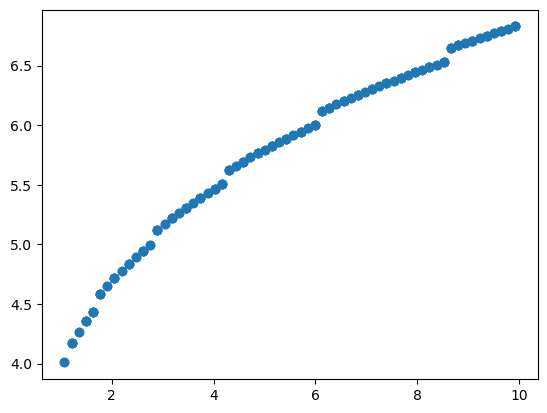

In [82]:
# scatter plot of param_values vs. all_runs.summary()["Volume [km3]"]
plt.scatter(param_values, all_runs.summary()["Volume [km3]"])

In [86]:
all_runs.summary()["Volume [km3]"].values

array([4.17293883, 5.69579669, 4.17293883, 5.69579669, 5.9475503 ,
       6.71047625, 5.9475503 , 6.71047625, 6.44348551, 4.83717142,
       6.44348551, 4.83717142, 5.30809735, 6.25366926, 5.30809735,
       6.25366926, 5.69579669, 4.17293883, 5.69579669, 4.17293883,
       6.71047625, 5.9475503 , 6.71047625, 5.9475503 , 6.25366926,
       5.30809735, 6.25366926, 5.30809735, 4.83717142, 6.44348551,
       4.83717142, 6.44348551, 5.12521457, 5.12521457, 5.12521457,
       5.12521457, 6.35153289, 6.35153289, 6.35153289, 6.35153289,
       6.79007857, 5.82733783, 6.79007857, 5.82733783, 5.82733783,
       6.79007857, 5.82733783, 6.79007857, 5.46838684, 5.46838684,
       5.46838684, 5.46838684, 6.5303772 , 6.5303772 , 6.5303772 ,
       6.5303772 , 6.1485244 , 4.58020579, 6.1485244 , 4.58020579,
       4.58020579, 6.1485244 , 4.58020579, 6.1485244 , 4.7159365 ,
       4.7159365 , 4.7159365 , 4.7159365 , 6.20192869, 6.20192869,
       6.20192869, 6.20192869, 6.66950499, 5.62515409, 6.66950

In [90]:
sobol_result = sobol.analyze(problem, all_runs.summary()["Volume [km3]"].values)

In [91]:
sobol_result

{'S1': array([0.98626707]),
 'S1_conf': array([0.34919083]),
 'ST': array([0.9815636]),
 'ST_conf': array([0.27087153]),
 'S2': array([[nan]]),
 'S2_conf': array([[nan]])}